In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
!pip install scikit-learn
from sklearn.neural_network import MLPClassifier
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('spam.csv', encoding='cp1252')


In [3]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
565,ham,"Ill call u 2mrw at ninish, with my address tha...",NaN,NaN,NaN
4495,ham,"In case you wake up wondering where I am, I fo...",NaN,NaN,NaN
3021,ham,How dare you change my ring,NaN,NaN,NaN
763,ham,Nothing but we jus tot u would ask cos u ba gu...,NaN,NaN,NaN
2860,ham,I am not at all happy with what you saying or ...,NaN,NaN,NaN
4911,ham,I am on the way to tirupur.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
718,spam,You have WON a guaranteed å£1000 cash or a å£2...
5037,ham,Thanks for being there for me just to talk to ...
1884,ham,I love your ass! Do you enjoy doggy style? :)
449,ham,10 min later k...
192,ham,Hi :)finally i completed the course:)


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4597,ham,I'm stuck in da middle of da row on da right h...
4457,ham,Die... I accidentally deleted e msg i suppose ...
1252,ham,Yeah like if it goes like it did with my frien...
3331,ham,Ok... The theory test? when are Ì_ going to bo...
3396,ham,Heehee that was so funny tho


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

In [14]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

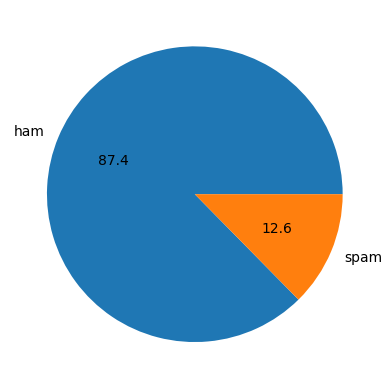

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.1f")
plt.show()

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df['num_characters']= df['text'].apply(len)
df.head()

<ipython-input-18-e9e5ce5f41d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df[['num_characters']].describe()

,num_characters
count,5169.000000
mean,78.977945
std,58.236293
min,2.000000
25%,36.000000
50%,60.000000
75%,117.000000
max,910.000000


In [20]:
df[df['target']=='spam'][['num_characters']].describe()


,num_characters
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [21]:
df[df['target']=='ham'][['num_characters']].describe()


,num_characters
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


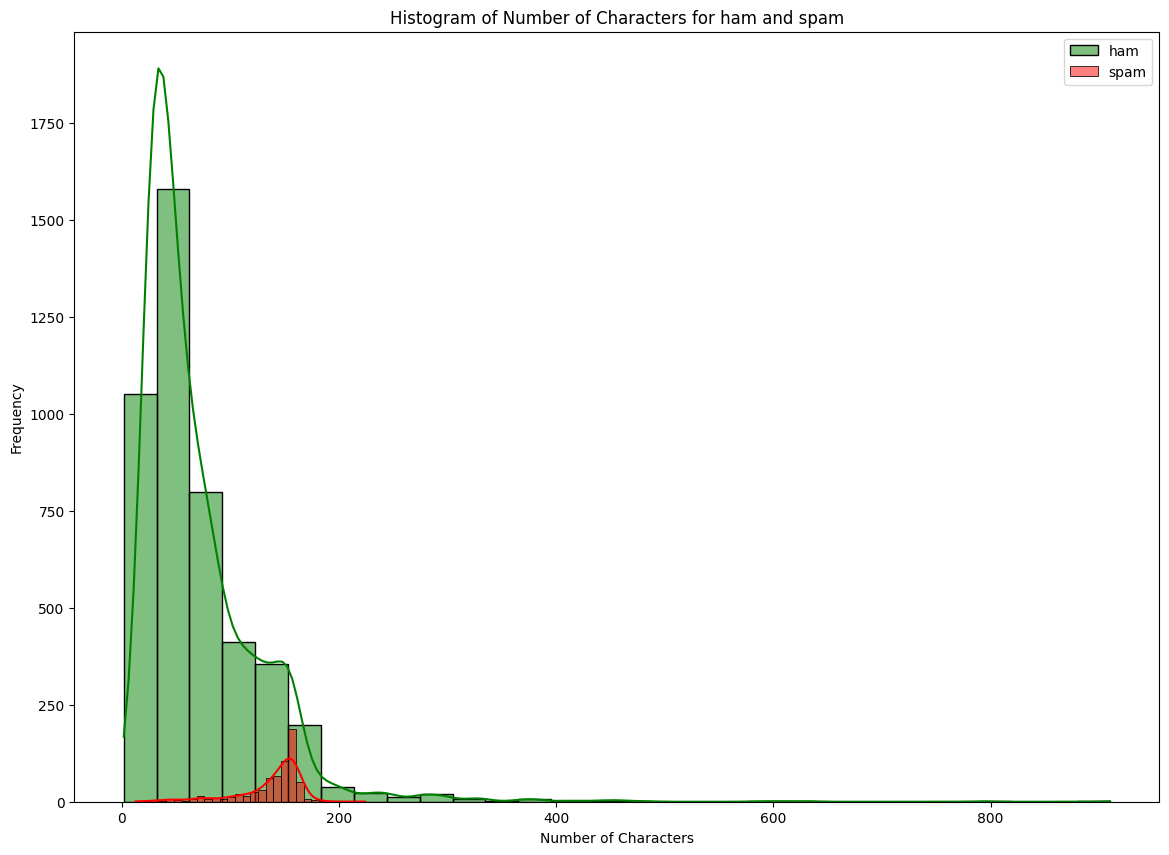

In [76]:
plt.figure(figsize=(14, 10))
sns.histplot(df[df['target'] == 'ham']['num_characters'], bins=30, color='green', label='ham', kde=True)
sns.histplot(df[df['target'] == 'spam']['num_characters'], bins=30, color='red', label='spam', kde=True)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters for ham and spam')
plt.legend()
plt.show()

In [55]:
count=CountVectorizer()
input=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005, Text FA to 87121 to receive entry question(std txt rate)T&Cs apply']
text=count.fit_transform(df['text'])
x_train, x_test, y_train, y_test= train_test_split(text, df['target'], test_size=0.25, random_state=1)
text

<5169x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 68032 stored elements in Compressed Sparse Row format>

In [56]:
print(x_train.shape)
print(x_test.shape)
input=text[5168]

(3876, 8672)
(1293, 8672)


In [47]:
model = MLPClassifier()
model.fit(x_train, y_train)


MLPClassifier()

In [57]:
print("Multinomial NB")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction, average='weighted')))
print("Recall score: {}".format(recall_score(y_test, prediction, average='weighted')))
print("F1 score: {}".format(f1_score(y_test, prediction, average='weighted')))

Multinomial NB
Accuracy score: 0.9775715390564579
Precision score: 0.9781337044560798
Recall score: 0.9775715390564579
F1 score: 0.9766334232725663


In [49]:
print("Bernoulli NB")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction, average='weighted')))
print("Recall score: {}".format(recall_score(y_test, prediction, average='weighted')))
print("F1 score: {}".format(f1_score(y_test, prediction, average='weighted')))

Bernoulli NB
Accuracy score: 0.9775715390564579
Precision score: 0.9781337044560798
Recall score: 0.9775715390564579
F1 score: 0.9766334232725663


In [50]:
print("MLP Classifier")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction, average='weighted')))
print("Recall score: {}".format(recall_score(y_test, prediction, average='weighted')))
print("F1 score: {}".format(f1_score(y_test, prediction, average='weighted')))

MLP Classifier
Accuracy score: 0.9775715390564579
Precision score: 0.9781337044560798
Recall score: 0.9775715390564579
F1 score: 0.9766334232725663


In [51]:
prediction=model.predict(x_test)
print(prediction)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [52]:
y_train=count.fit_transform(y_train)
y_test=count.fit_transform(y_test)
print(y_train.shape)
print(y_test.shape)

(3876, 2)
(1293, 2)


In [58]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [59]:
model.predict(input)

array(['ham'], dtype='<U4')

In [70]:
data=df['text']
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [74]:
input1 = ["Click on the link below to get rs 1 lac prize!!!CLAIM NOW"]
input1_transformed = count.transform(input1)  # Assuming 'count' is your CountVectorizer

# Reshape the input to a 2D array
input1_transformed_reshaped = input1_transformed.reshape(1, -1)

# Make the prediction
prediction = model.predict(input1_transformed_reshaped)

print("Predicted class for input1:", prediction)

Predicted class for input1: ['spam']
